In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import statsmodels.api as sm
import patsy as pt
from ggplot import *

# show graphs right in the notebook (rather that in another window)
%matplotlib inline

   # Load data

In [2]:
# load a data file
df = pd.DataFrame.from_csv("http://roman-kh.github.io/files/linear-models/simple1.csv")
# x - a table with factors x1,x2,x3
x = df.iloc[:,:-1]
# y - a table with a dependent variable
y = df.iloc[:,-1]
df.head()

,x1,x2,x3,y
0,17.486288,185.505167,0.0,161.600365
1,32.353509,182.540139,0.0,157.077034
2,20.629644,190.742210,0.0,155.571362
4,29.396574,169.742980,0.0,147.232886
5,19.673511,191.574909,0.0,149.530893


# Calculate with scikit-learn

In [3]:
# create an empty model
skm = lm.LinearRegression()
# calculate parameters
skm.fit(x, y)
# show them
skm.intercept_, skm.coef_

(20.215535404300113, array([  0.07461561,   0.71544973,  19.46500514]))

# Calculate with statsmodels

In [4]:
# add constant to calculate intercept
x_ = sm.add_constant(x)
smm = sm.OLS(y, x_)
res = smm.fit()
b = res.params.values
# model coefficients
b

array([ 20.2155354 ,   0.07461561,   0.71544973,  19.46500514])

# Calculate with statsmodels with formulas

In [5]:
# create a model with a formula
smm = sm.OLS.from_formula("y ~ x1 + x2 + x3", data=df)
# run calculations
res = smm.fit()
# show the coefficients
res.params.values

array([ 20.2155354 ,   0.07461561,   0.71544973,  19.46500514])

# Calculate with patsy + numpy

In [6]:
# create a factor matrix and a result matrix from a dataframe
pt_y, pt_x = pt.dmatrices("y ~ x1 + x2 + x3", df)
# use ordinary least squares
res = np.linalg.lstsq(pt_x, pt_y)
# show the model coefficients
res[0].ravel()

array([ 20.2155354 ,   0.07461561,   0.71544973,  19.46500514])

# Look at your data

D:\Python27_A64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


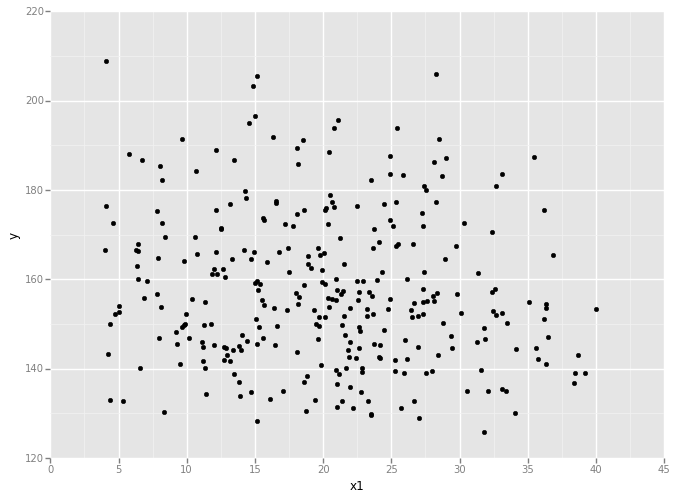

<ggplot: (15687716)>

In [7]:
ggplot(aes(x="x1", y="y"), data=df) + geom_point()

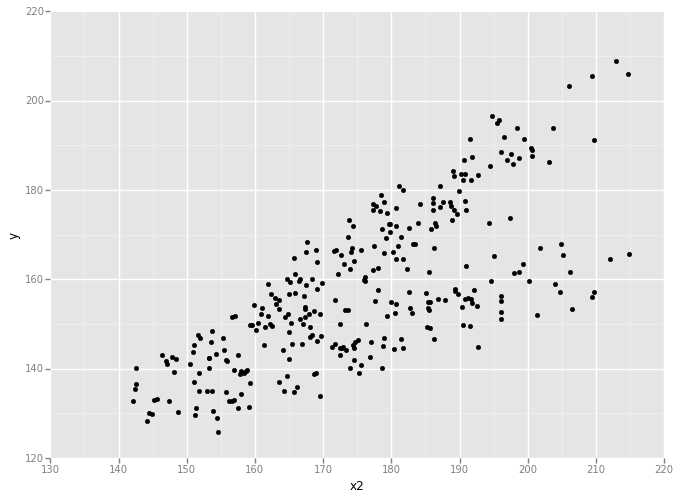

<ggplot: (12339155)>

In [8]:
ggplot(aes(x="x2", y="y"), data=df) + geom_point()

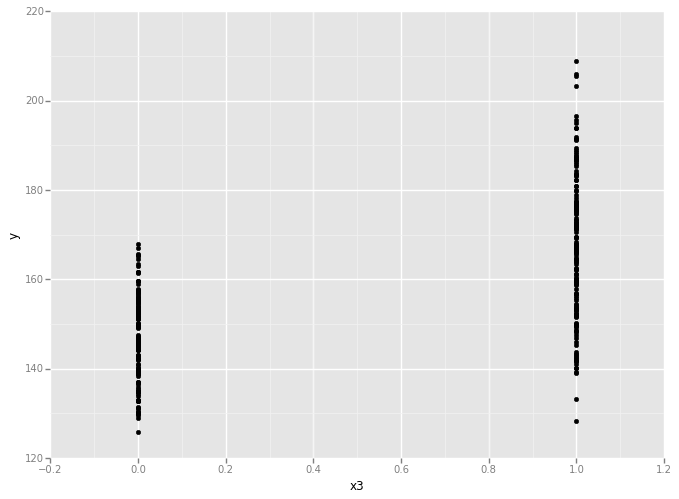

<ggplot: (15498265)>

In [9]:
ggplot(aes(x="x3", y="y"), data=df) + geom_point()

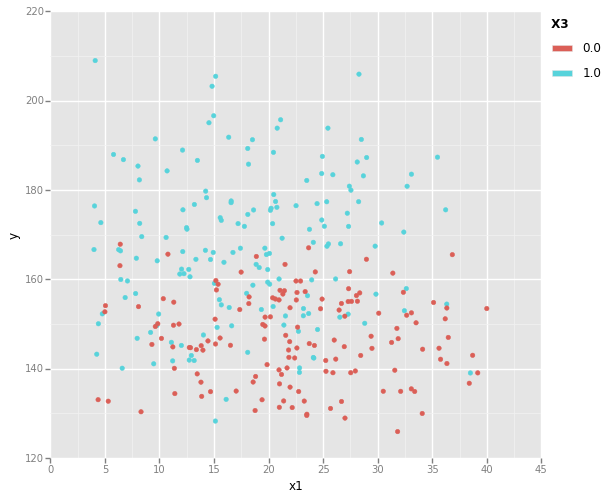

<ggplot: (12291665)>

In [10]:
ggplot(aes(x="x1", y="y", color="x3"), data=df) + geom_point()

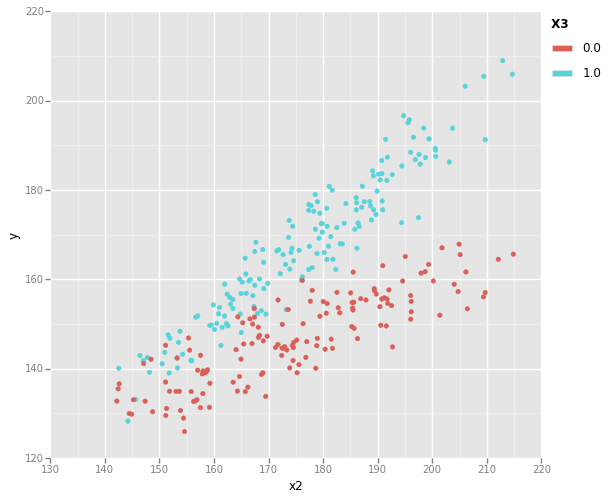

<ggplot: (15473419)>

In [11]:
ggplot(aes(x="x2", y="y",color="x3"), data=df) + geom_point()

# Show the model

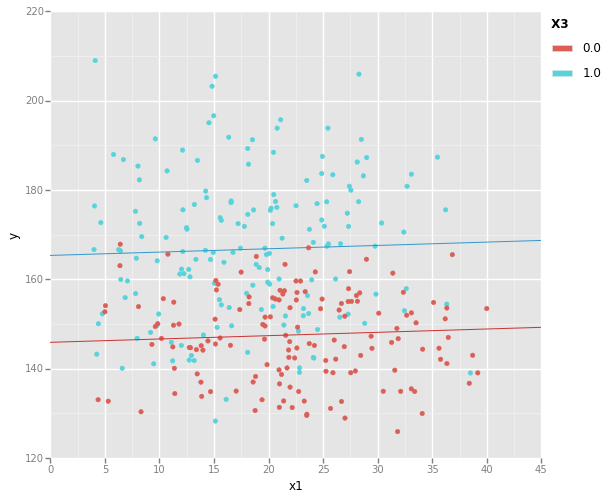

<ggplot: (16012808)>

In [12]:
# calculate intercept for both lines: x3=0 and x3=1
b0w = b[0] + df["x2"].mean() * b[2] 
b0m = b[0] + df["x2"].mean() * b[2] + b[3] 

gg = ggplot(aes(x="x1",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w, slope=b[1], color="#CC3333")
gg += geom_abline(intercept=b0m, slope=b[1], color="#3399CC")
gg

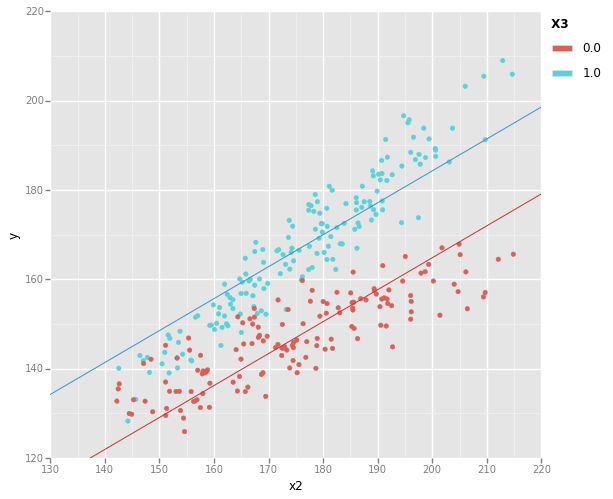

<ggplot: (15473479)>

In [13]:
b0w = b[0] + df["x1"].mean() * b[1] 
b0m = b[0] + df["x1"].mean() * b[1] + b[3]

gg = ggplot(aes(x="x2",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w, slope=b[2], color="#CC3333")
gg += geom_abline(intercept=b0m, slope=b[2], color="#3399CC")
gg

# Add x2*x3 term

   # scikit-learn

In [14]:
# create a new factor x2*x3
x["x4"] = x["x2"] * x["x3"] 
skm = lm.LinearRegression()
skm.fit(x, y)
skm.intercept_, skm.coef_

(62.989293874793603,
 array([  1.99115993e-02,   4.77769299e-01,  -6.82173181e+01,
          4.97960890e-01]))

   # statsmodels

In [15]:
x["x4"] = x["x2"] * x["x3"] 
x_ = sm.add_constant(x)
smm = sm.OLS(y, x_)
res = smm.fit()
b2 = res.params.values
b2

array([  6.29892939e+01,   1.99115993e-02,   4.77769299e-01,
        -6.82173181e+01,   4.97960890e-01])

   # statsmodels with formulas

In [16]:
smm = sm.OLS.from_formula("y ~ x1 + x2 + x3 + x2*x3", data=df)
res = smm.fit()
res.params.values

array([  6.29892939e+01,   1.99115993e-02,   4.77769299e-01,
        -6.82173181e+01,   4.97960890e-01])

   # patsy + numpy

In [17]:
pt_y, pt_x = pt.dmatrices("y ~ x1 + x2 + x3 + x2*x3", df)
res = np.linalg.lstsq(pt_x, pt_y)
res[0].ravel()

array([  6.29892939e+01,   1.99115993e-02,   4.77769299e-01,
        -6.82173181e+01,   4.97960890e-01])

# Show the model again

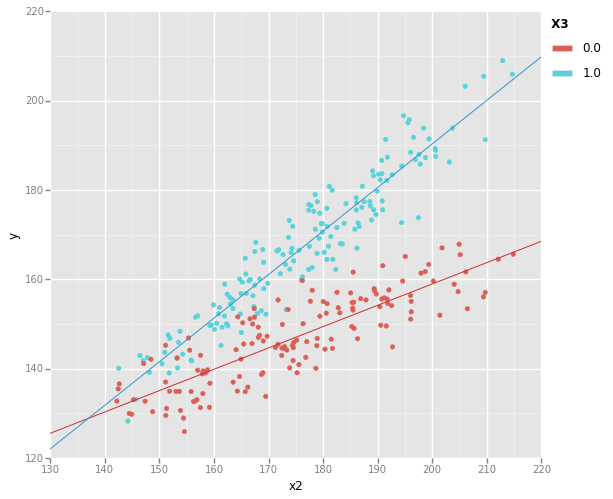

<ggplot: (16219620)>

In [18]:
b0w2 = b2[0] + df["x1"].mean() * b2[1] 
b0m2 = b2[0] + df["x1"].mean() * b2[1] + b2[3]

gg = ggplot(aes(x="x2",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w2, slope=b2[2], color="#CC3333")
gg += geom_abline(intercept=b0m2, slope=b2[2]+b2[4], color="#3399CC")
gg

# This looks much better now!